## Integrantes
- Aquino Cruz, Leonardo José
- Carrasco Hernández, Florentino Josue
- Gamarra Vega, Anderson Jose

In [44]:
import heapq as hq
import numpy as np
import graphviz as gv
import math

In [45]:
def BusquedaXCostoUniforme(G, s, t): 
    n = len(G)
    visitados = [False]*n
    pesos  = [math.inf]*n
    ruta    = [None]*n
    cola   = [] 
    hq.heappush(cola, (0, s)) 
    pesos[s] = 0 
    
    while len(cola) > 0:
        g, u = hq.heappop(cola) 
        if visitados[u]: 
            continue
        if u == t: 
            break
        visitados[u] = True 
        for v, w in G[u]: 
             if not visitados[v]: 
                f = g + w 
                if f < pesos[v]: 
                    pesos[v] = f
                    ruta[v]   = u
                    hq.heappush(cola, (f, v))  
    return ruta, pesos

In [46]:
T = [[(1, 1), (2, 2),(3, 1),(5,5)],
     [(0, 1), (2, 1)],
     [(1, 1), (0, 2), (3, 2),(4, 3)],
     [(0, 1), (2, 2), (4, 2),(5, 3),(6, 4)],
     [(2, 3), (3, 2), (6, 1)],
     [(1, 7), (3, 1), (4, 3)],
     [(4, 1), (3, 4), (5, 3)]
     ]

In [47]:
def drawG_al(G, directed=False, weighted=False, path=[], layout="sfdp"):
  graph = gv.Digraph("digrafo") if directed else gv.Graph("grafo")
  graph.graph_attr["layout"] = layout
  graph.edge_attr["color"] = "gray"
  graph.node_attr["color"] = "orangered"
  graph.node_attr["width"] = "0.1"
  graph.node_attr["height"] = "0.1"
  graph.node_attr["fontsize"] = "8"
  graph.node_attr["fontcolor"] = "mediumslateblue"
  graph.node_attr["fontname"] = "monospace"
  graph.edge_attr["fontsize"] = "8"
  graph.edge_attr["fontname"] = "monospace"
  n = len(G)
  added = set()
  for v, u in enumerate(path):
    if u != -1:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        graph.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        graph.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  for u in range(n):
    for v, w in G[u]:
      draw = False
      if not directed and not f"{u},{v}" in added:  
        added.add(f"{u},{v}")
        added.add(f"{v},{u}")
        draw = True
      elif directed:
        draw = True
      if draw:
        if weighted:
          graph.edge(str(u), str(v), str(w))
        else:
          graph.edge(str(u), str(v))
  return graph

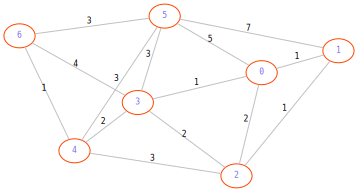

In [33]:
drawG_al(T, weighted=True)

In [51]:
vertices=['A', 'B','C','D','E','F','G']
#vertices=[0,   1,  2,  3,  4,  5,  6]
inicial=1
final=6
ruta, pesos = BusquedaXCostoUniforme(T, inicial, final) # ruta de B --->G


print('\nVector de pesos: ', pesos)
print('De',vertices[inicial], ' a ', vertices[final],' se llega con peso ',pesos[final])
print('\nRUTA:')

#imprimiendo la ruta
while final != None:
    print(vertices[final], final)
    final = ruta[final]


Vector de pesos:  [1, 0, 1, 2, 4, 5, 5]
De B  a  G  se llega con peso  5

RUTA:
G 6
E 4
C 2
B 1
